In [1]:
import re
import random
import json
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
with open("D://Study Material//GLATHON//PyTorch_model//Pyrates_bot-main//FINAL//back//intents.json", "r", encoding="utf8") as file:
    data = json.load(file)
intents = data["intents"]

In [3]:
df = pd.DataFrame(intents)
df

,tag,patterns,responses
0,greeting,"[hi, hi , Hi, hiiiiii, hiii, hii, hlo, how are...","[Hi there, how can I help?]"
1,goodbye,"[cya, see you, bye bye, See you later, Goodbye...",[Sad to see you go :(]
2,creator,"[what is the name of your developers, what is ...",[College students]
3,college_name,"[name of your college, your college name, what...",[G L A University]
4,name,"[name, your name, do you have a name, what are...",[I am a Chatbot.]
...,...,...,...
131,cricket ground location,"[cricket ground location, what is the location...",[Hi there! you can reach the cricket ground b...
132,gd subway location,"[gd subway location, gd subway, where is gd su...",[Hi there! you can reach the gd subway (comple...
133,dispensary location,"[dispensary, how to reach dispensary, location...",[Hi there! you can reach the dispensary of uni...
134,helipad location,"[helipad location, how to reach helipad, where...",[Hi there! you can reach the helipad in gla un...


In [4]:
Patterns = []
Tags = []
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess_text(text):
    # Normalize text (convert to lowercase and remove non-alphanumeric characters)
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)   #Substitute the matched string in text with space.

    #Tokenize text
    tokenized_words = word_tokenize(text)

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_words]   #changing, Changed---->change

    # Join the preprocessed words back into a single string
    processed_text = " ".join(lemmatized_words)
    return processed_text

In [6]:
for intent in intents:
    tag = intent['tag']
    patterns = intent['patterns']
    for pattern in patterns:
        processed_pattern = preprocess_text(pattern)
        Patterns.append(processed_pattern)
        Tags.append(tag)

In [7]:
pd.DataFrame({'Patterns':Patterns, 'Tags':Tags})

,Patterns,Tags
0,hi,greeting
1,hi,greeting
2,hi,greeting
3,hiiiiii,greeting
4,hiii,greeting
...,...,...
2161,widely,unanswered
2162,word,unanswered
2163,world,unanswered
2164,youd,unanswered


In [8]:
# Tokenize words
tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(Patterns)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Encode the classes
encoder = LabelEncoder()
encoder.fit(Tags)
y = encoder.transform(Tags)

# Pad sequences
max_length = 20
X = pad_sequences(tokenizer.texts_to_sequences(Patterns), maxlen=max_length, padding="post")

In [9]:
# X = X.flatten()
# print("Original X : ",X)
# X = (X-min(X))/(max(X)-min(X))
# X = np.array(X).reshape(2166,20)
# print("Normalized X : ",X)
# print("Original y : ",y)
# y = (y-min(y))/(max(y)-min(y))
# print("Normalized y : ",y)



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128, input_length=max_length, trainable=True))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           150144    
                                                                 
 conv1d (Conv1D)             (None, 16, 128)           82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                        

In [12]:
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100


55/55 [==============================] - 2s 12ms/step - loss: 3.7101 - accuracy: 0.3764 - val_loss: 3.1452 - val_accuracy: 0.3871
Epoch 2/100
55/55 [==============================] - 0s 9ms/step - loss: 2.9309 - accuracy: 0.3949 - val_loss: 2.8692 - val_accuracy: 0.3871
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 2.7081 - accuracy: 0.4111 - val_loss: 2.7431 - val_accuracy: 0.4055
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 2.5650 - accuracy: 0.4105 - val_loss: 2.6355 - val_accuracy: 0.4055
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 2.4501 - accuracy: 0.4197 - val_loss: 2.5559 - val_accuracy: 0.4078
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 2.3723 - accuracy: 0.4157 - val_loss: 2.6315 - val_accuracy: 0.3986
Epoch 7/100
55/55 [==============================] - 0s 7ms/step - loss: 2.3081 - accuracy: 0.4290 - val_loss: 2.4534 - val_accuracy: 0.4078
Epoch 8/100
55/55 [=====

In [13]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

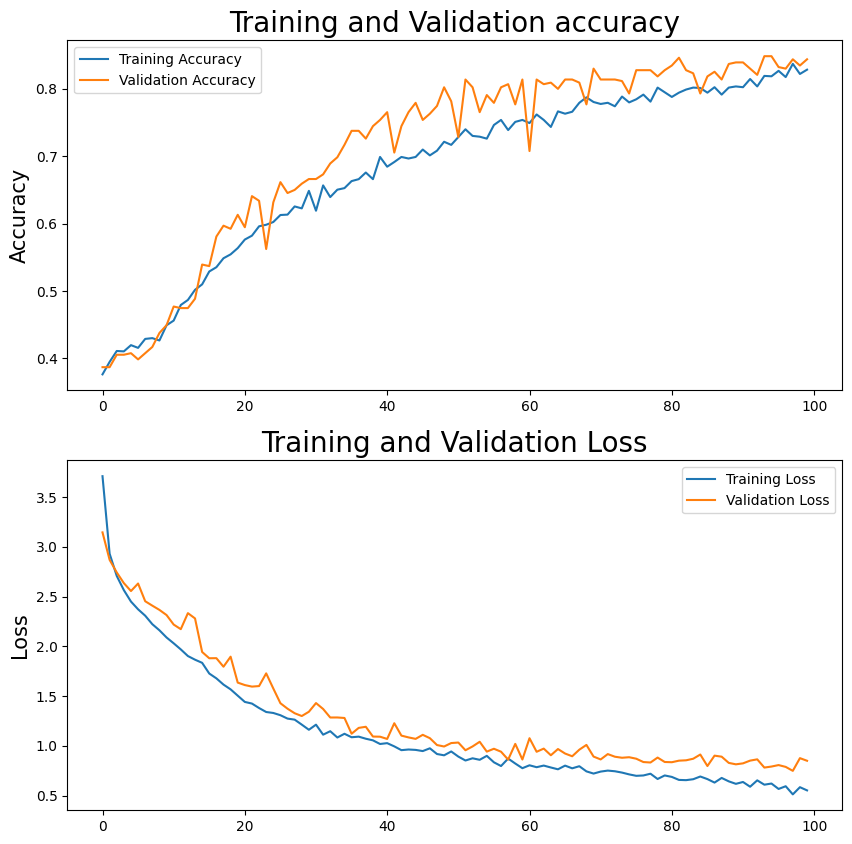

In [14]:
import matplotlib.pyplot as plt 

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(accuracy))

fig = plt.figure(figsize = (10, 10), edgecolor = 'Black')
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(epochs, accuracy, label = 'Training Accuracy')
ax1.plot(epochs, val_accuracy, label = 'Validation Accuracy')
ax1.set_title("Training and Validation accuracy", fontsize = 20)
ax1.set_ylabel("Accuracy", fontsize = 15)
ax1.legend()

ax2.plot(epochs, loss, label = 'Training Loss')
ax2.plot(epochs, val_loss, label = 'Validation Loss')
ax2.set_title("Training and Validation Loss", fontsize = 20)
ax2.set_ylabel("Loss", fontsize = 15)
ax2.legend()

plt.show()

In [15]:
print(accuracy[-1])

0.8279445767402649


In [32]:
def get_response():
    while True:
        print("Enter your message:")
        message = input()
        message = preprocess_text(message)
        if message == "quit" or message == "stop":
            break
        message = pad_sequences(tokenizer.texts_to_sequences([message]), maxlen=max_length, padding="post")
        prediction = model.predict(message)
        tag = encoder.inverse_transform([np.argmax(prediction)])
        # for intent in intents:
        #     if intent['tag'] == tag:
        #         print(random.choice(intent['responses']))
        print(message)

In [33]:
get_response()

Enter your message:
1/1 [==============================] - 0s 32ms/step
[[337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]
Enter your message:
1/1 [==============================] - 0s 32ms/step
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Enter your message:
1/1 [==============================] - 0s 26ms/step
[[476   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]
Enter your message:
1/1 [==============================] - 0s 23ms/step
[[ 7  2 38 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Enter your message:
